There could be many things one can understand by analyzing this dataset.

What is the major reason people being kidnapped in each and every state?       
Offenders relation to the rape victim       
Juveniles family background, education and economic setup.           
Which state has more crime against children and women?         
Age group wise murder victim            
Crime by place of occurrence.            
Anti corruption cases vs arrests.               
Which state has more number of complaints against police?            
Which state is the safest for foreigners?              

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Major Reason for people being kidnapped in each and every state

In [39]:
Kidnap_data = pd.read_csv('39_specific_purpose_of_kidnapping_and_abduction.csv')

In [41]:
Kidnap_data.columns

Index(['area_name', 'year', 'group_name', 'sub_group_name',
       'k_a_cases_reported', 'k_a_female_10_15_years',
       'k_a_female_15_18_years', 'k_a_female_18_30_years',
       'k_a_female_30_50_years', 'k_a_female_above_50_years',
       'k_a_female_total', 'k_a_female_upto_10_years', 'k_a_grand_total',
       'k_a_male_10_15_years', 'k_a_male_15_18_years', 'k_a_male_18_30_years',
       'k_a_male_30_50_years', 'k_a_male_above_50_years', 'k_a_male_total',
       'k_a_male_upto_10_years'],
      dtype='object')

In [45]:
Kidnap_data.shape

(3569, 20)

In [43]:
Kidnap_data.isna().sum()

area_name                      0
year                           0
group_name                     0
sub_group_name                 0
k_a_cases_reported             7
k_a_female_10_15_years       391
k_a_female_15_18_years       338
k_a_female_18_30_years       309
k_a_female_30_50_years       450
k_a_female_above_50_years    621
k_a_female_total             162
k_a_female_upto_10_years     495
k_a_grand_total               59
k_a_male_10_15_years         483
k_a_male_15_18_years         488
k_a_male_18_30_years         367
k_a_male_30_50_years         417
k_a_male_above_50_years      558
k_a_male_total               257
k_a_male_upto_10_years       471
dtype: int64

* Null values in this data means there are no such incidents , we can replace those values with zero

In [47]:
Kidnap_data = Kidnap_data.fillna(0)

In [49]:
Kidnap_data.head()

,area_name,year,group_name,sub_group_name,k_a_cases_reported,k_a_female_10_15_years,k_a_female_15_18_years,k_a_female_18_30_years,k_a_female_30_50_years,k_a_female_above_50_years,k_a_female_total,k_a_female_upto_10_years,k_a_grand_total,k_a_male_10_15_years,k_a_male_15_18_years,k_a_male_18_30_years,k_a_male_30_50_years,k_a_male_above_50_years,k_a_male_total,k_a_male_upto_10_years
0,Andhra Pradesh,2001,Kidnap - For Adoption,01. For Adoption,8.0,0.0,0.0,4.0,0.0,0.0,5.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
1,Arunachal Pradesh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Assam,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bihar,2001,Kidnap - For Adoption,01. For Adoption,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,15.0,3.0,0.0,18.0,0.0
4,Chandigarh,2001,Kidnap - For Adoption,01. For Adoption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* k_a_grand_total gives total number of kidnaps in the particular category under all age groups                   
* k_a_female_total gives total number of females kidnapped in the particular category under all age groups         
* k_a_male_total gives total number of males kidnapped in the particular category under all age groups

In [52]:
Kidnap_data.groupby('sub_group_name')['k_a_grand_total'].sum()

sub_group_name
01. For Adoption                    963.0
02. For Begging                     275.0
03. for Camel Racing                  5.0
04. For Illicit Intercourse       23552.0
05. For Marriage                 119107.0
06. For Prostitution               3414.0
07. For Ransom                     9341.0
08. For Revenge                    5873.0
09. For Sale                        686.0
10. For Selling Bodyparts            16.0
11. For Slavery                     904.0
12. For Unlawful Activity          6360.0
13. Other Purposes                97505.0
14. Total (Sum of 1-13 Above)    268001.0
Name: k_a_grand_total, dtype: float64

In [56]:
Kidnap_data[Kidnap_data['group_name'] != 'Kidnap - Total'].tail()

,area_name,year,group_name,sub_group_name,k_a_cases_reported,k_a_female_10_15_years,k_a_female_15_18_years,k_a_female_18_30_years,k_a_female_30_50_years,k_a_female_above_50_years,k_a_female_total,k_a_female_upto_10_years,k_a_grand_total,k_a_male_10_15_years,k_a_male_15_18_years,k_a_male_18_30_years,k_a_male_30_50_years,k_a_male_above_50_years,k_a_male_total,k_a_male_upto_10_years
3226,Tamil Nadu,2010,Kidnap - For Other Purposes,13. Other Purposes,483.0,15.0,62.0,118.0,31.0,3.0,241.0,12.0,488.0,4.0,2.0,87.0,136.0,11.0,247.0,7.0
3227,Tripura,2010,Kidnap - For Other Purposes,13. Other Purposes,33.0,3.0,3.0,9.0,5.0,0.0,20.0,0.0,34.0,1.0,0.0,6.0,6.0,0.0,14.0,1.0
3228,Uttar Pradesh,2010,Kidnap - For Other Purposes,13. Other Purposes,792.0,18.0,13.0,39.0,12.0,0.0,85.0,3.0,792.0,29.0,38.0,390.0,221.0,8.0,707.0,21.0
3229,Uttarakhand,2010,Kidnap - For Other Purposes,13. Other Purposes,123.0,0.0,0.0,59.0,29.0,0.0,88.0,0.0,123.0,3.0,5.0,23.0,4.0,0.0,35.0,0.0
3230,West Bengal,2010,Kidnap - For Other Purposes,13. Other Purposes,2271.0,0.0,6.0,1170.0,694.0,15.0,1885.0,0.0,2271.0,4.0,6.0,198.0,172.0,5.0,386.0,1.0


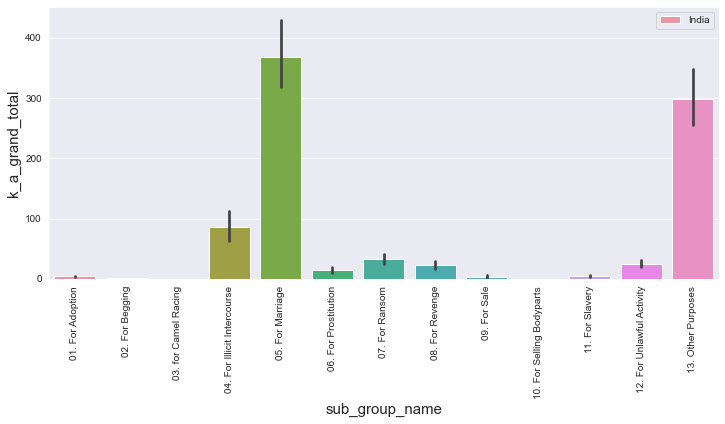

In [73]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,5))
sns.barplot('sub_group_name',
           'k_a_grand_total',
           data = Kidnap_data[Kidnap_data['group_name'] != 'Kidnap - Total'],
           label = "India");
plt.legend()
plt.xlabel('sub_group_name',size = 15)
plt.ylabel('k_a_grand_total',size = 15)
plt.xticks(rotation = 90);

* In **India** most number of kidnaps are occuring for **Marriage**

Now lets find the major reasons for kipnaps in each and every state of India

In [69]:
# list containing all the states ansd union teritories in India
state_uts = list(Kidnap_data.area_name.unique())

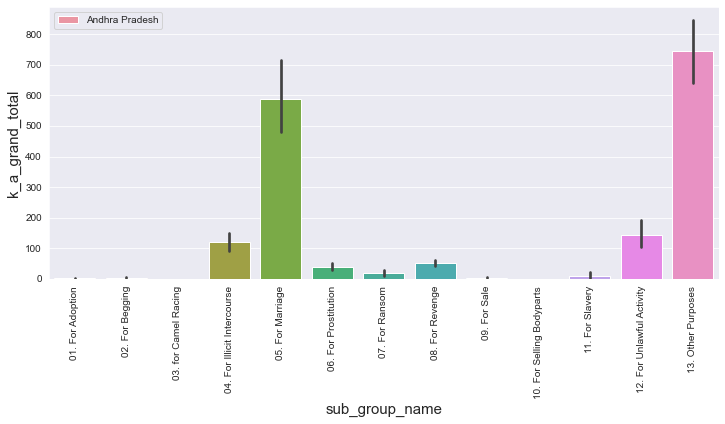

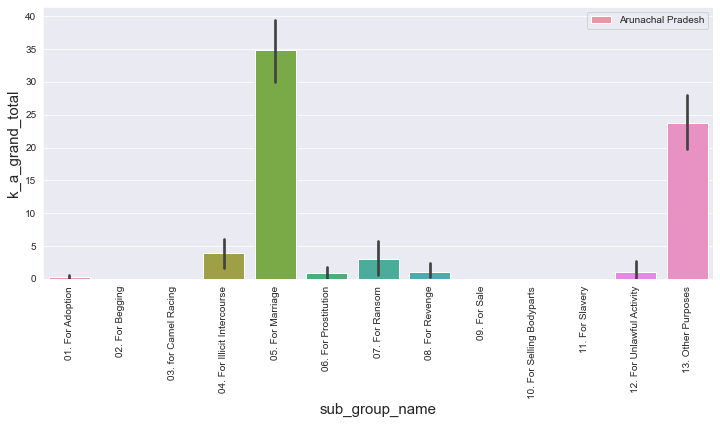

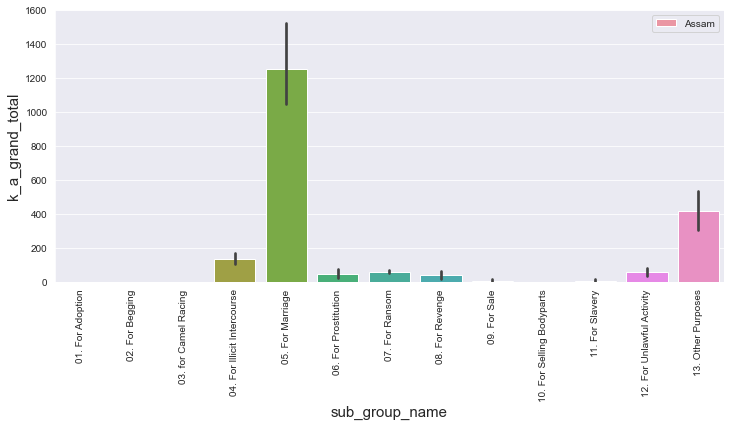

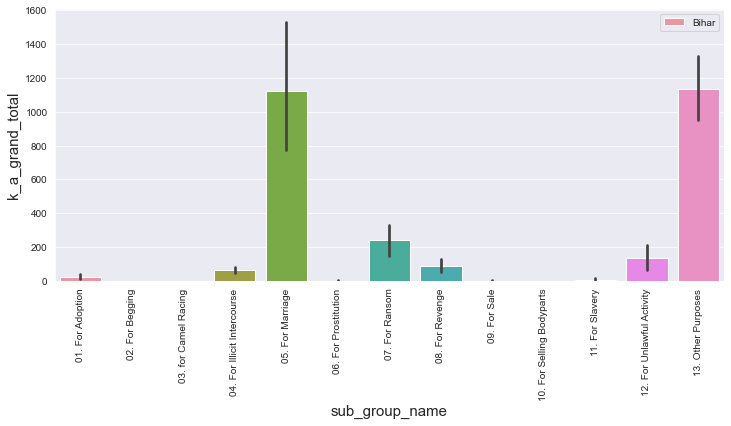

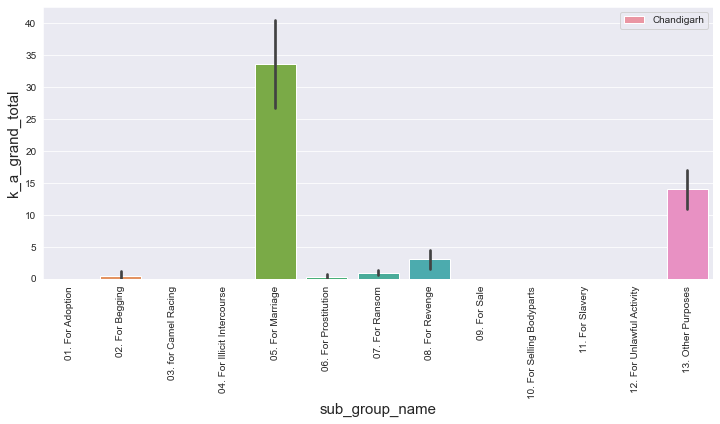

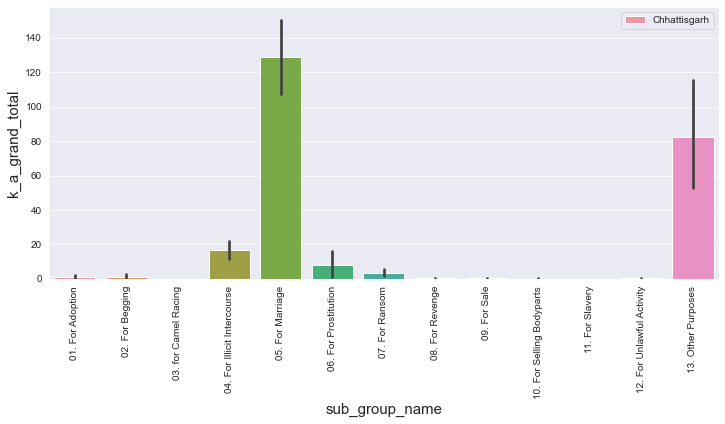

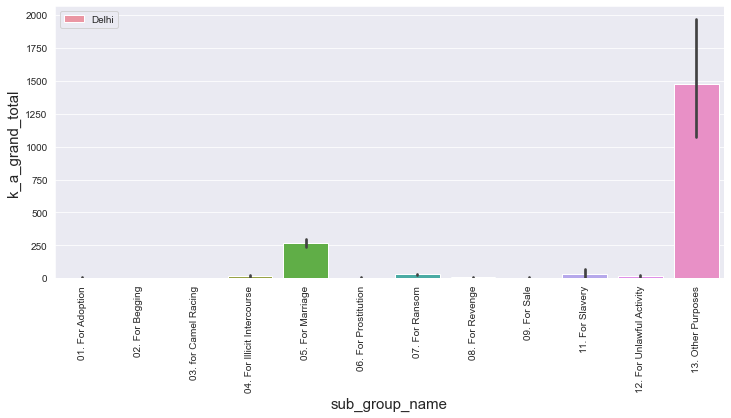

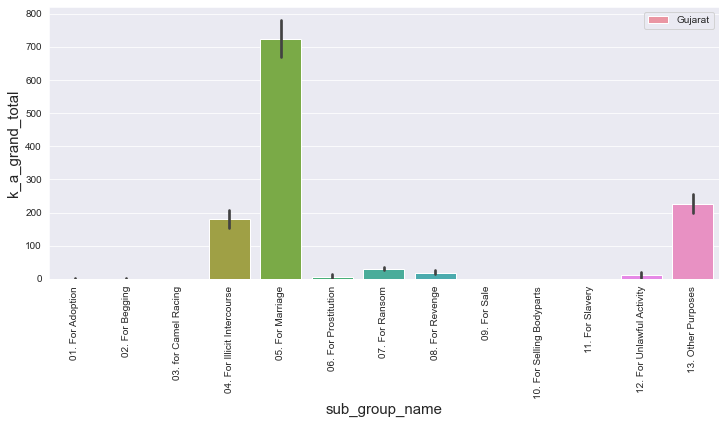

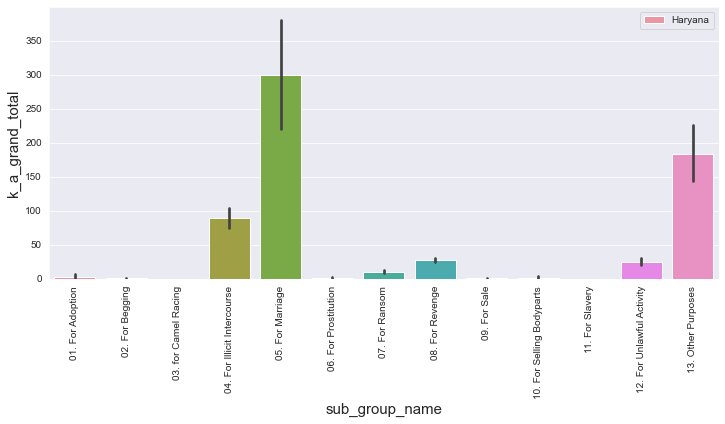

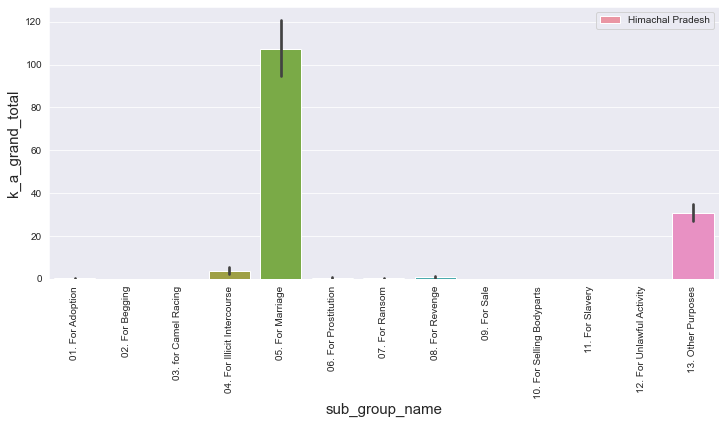

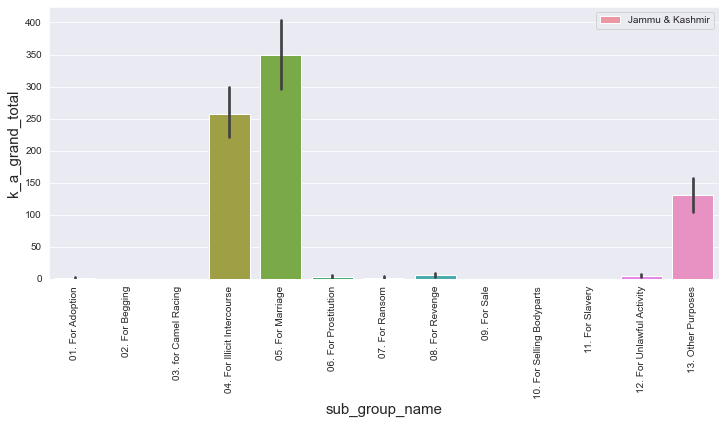

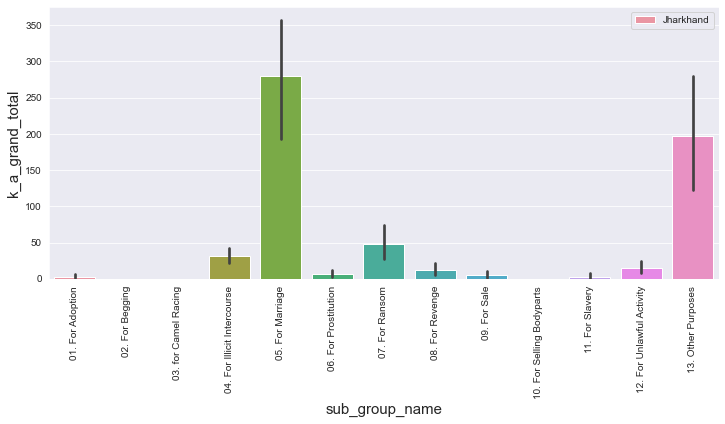

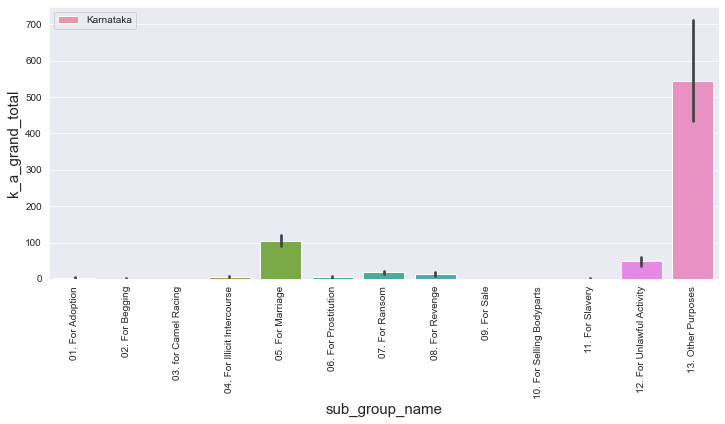

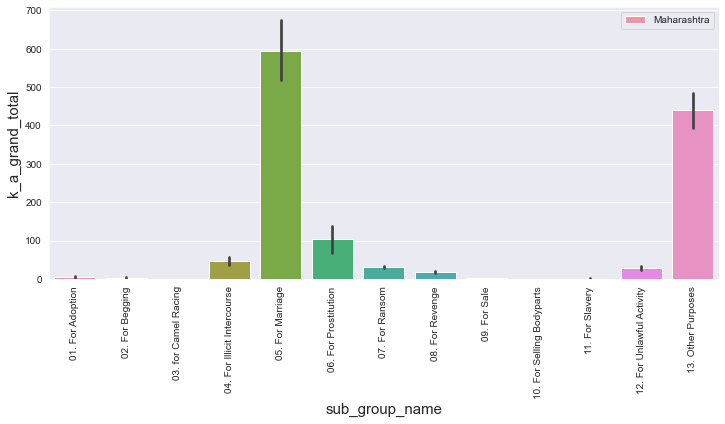

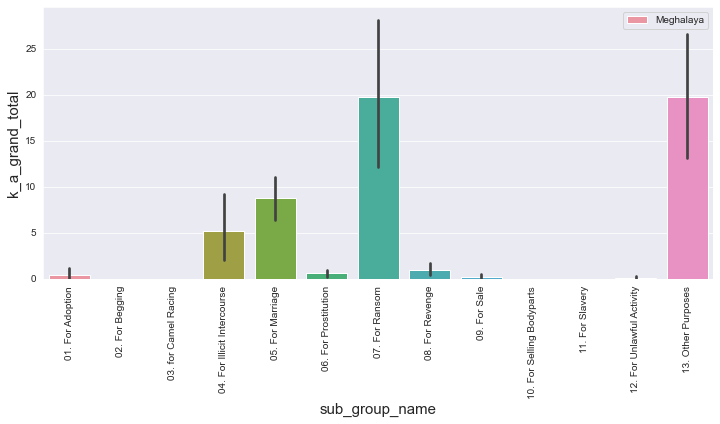

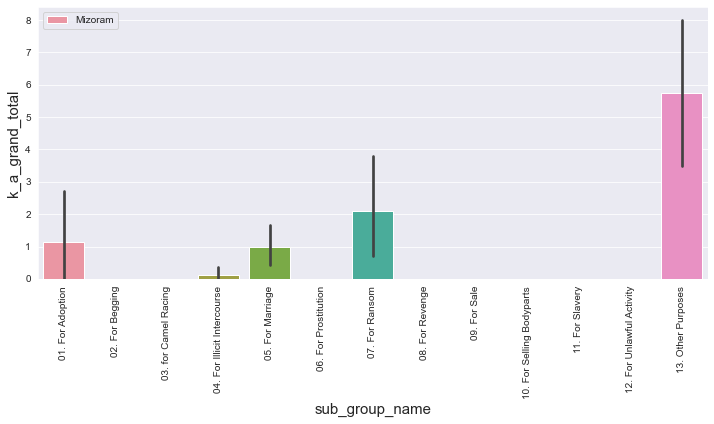

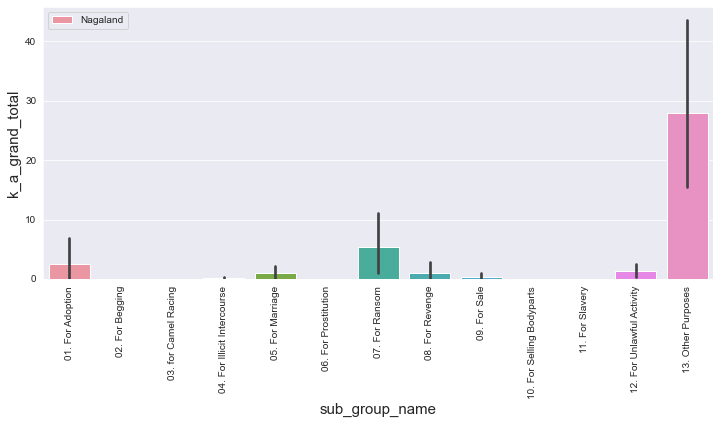

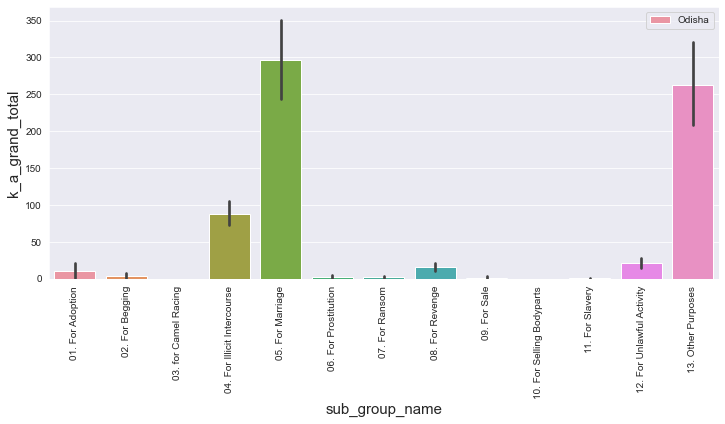

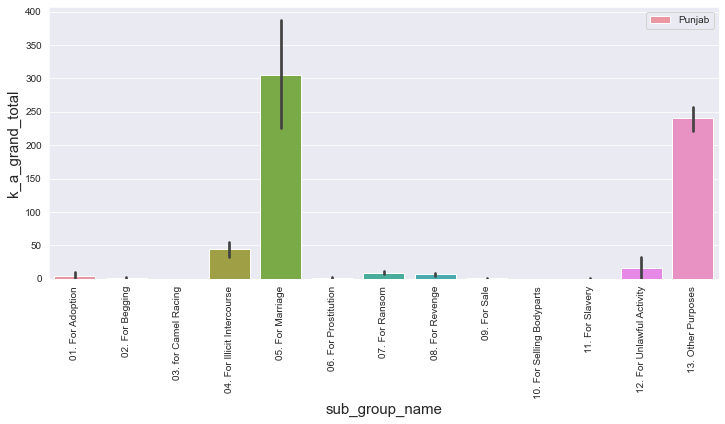

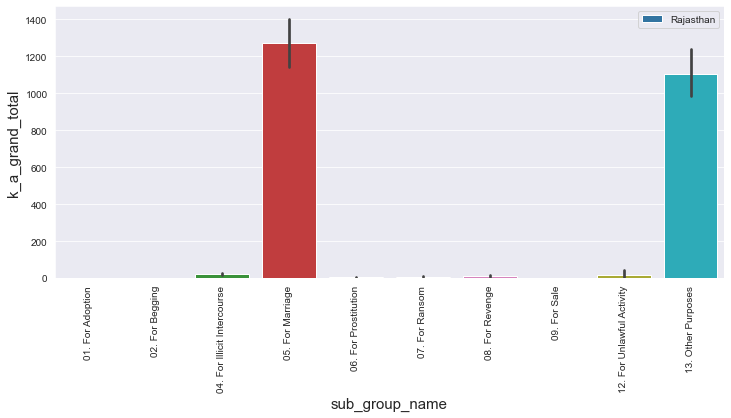

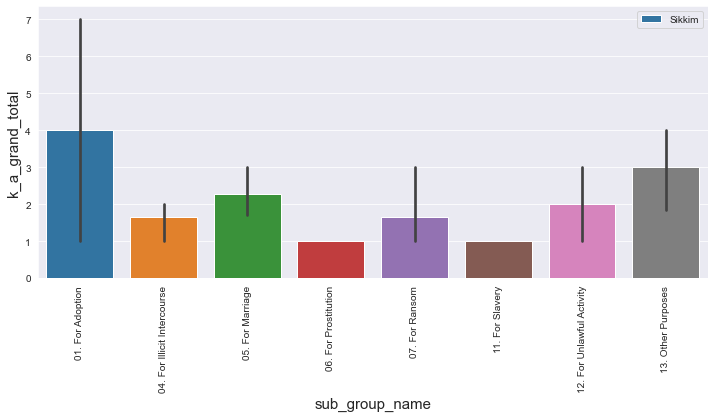

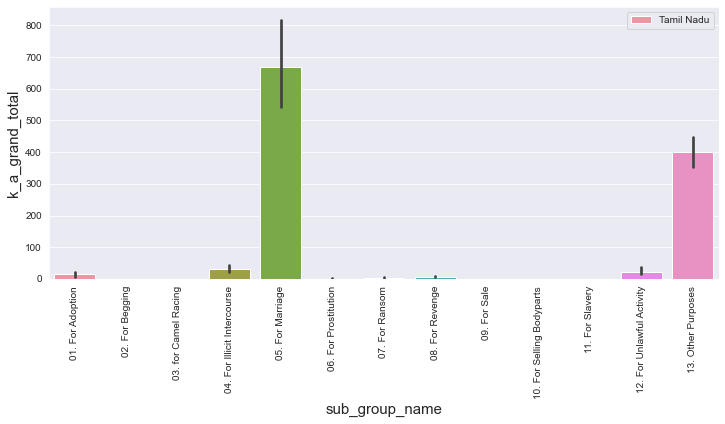

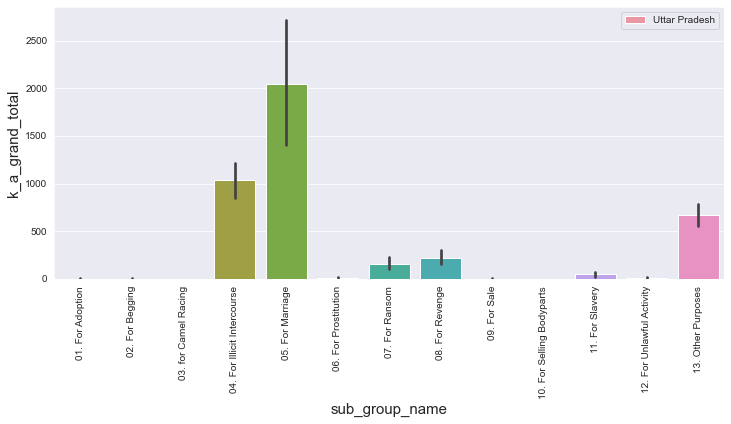

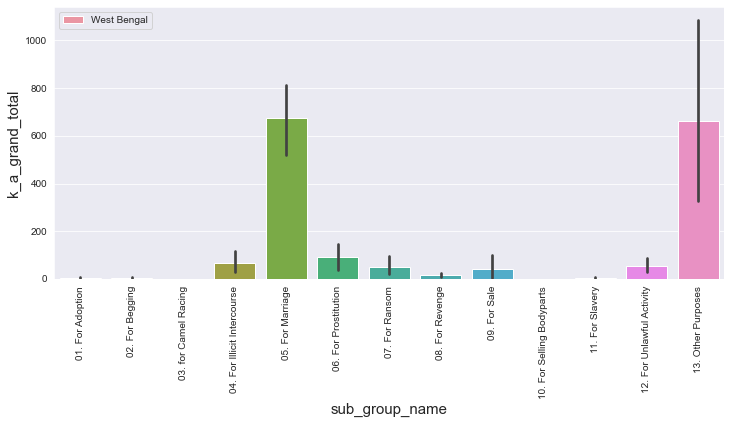

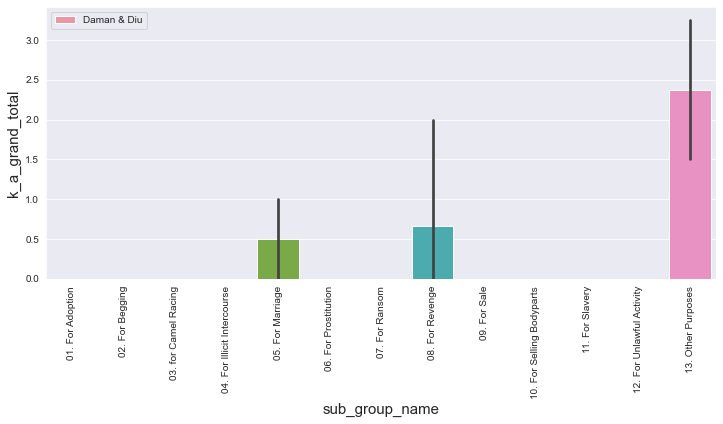

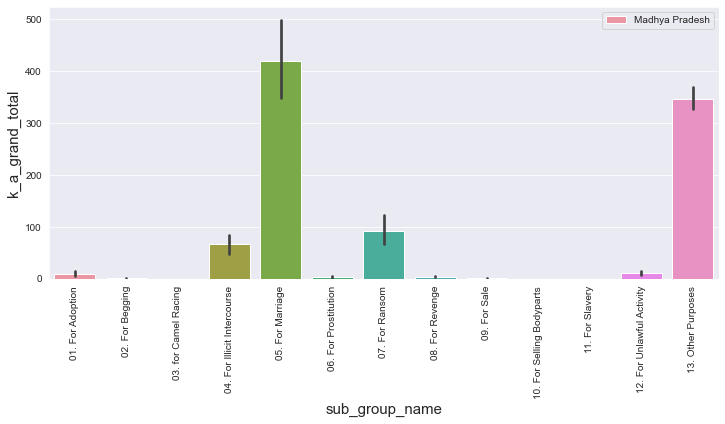

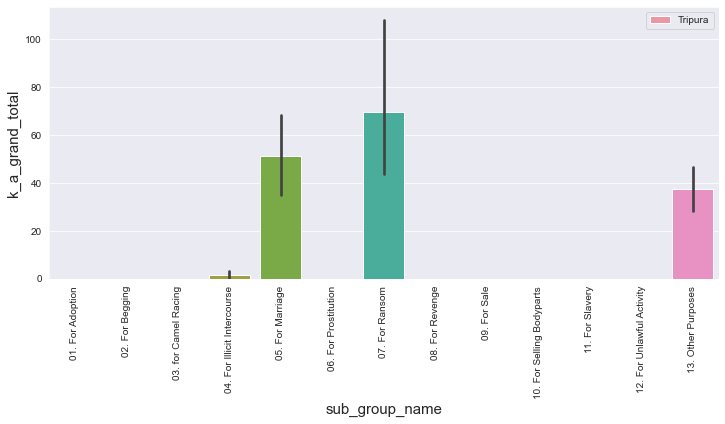

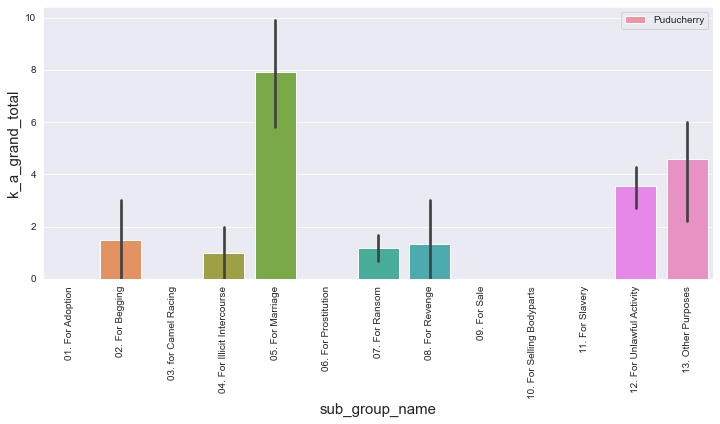

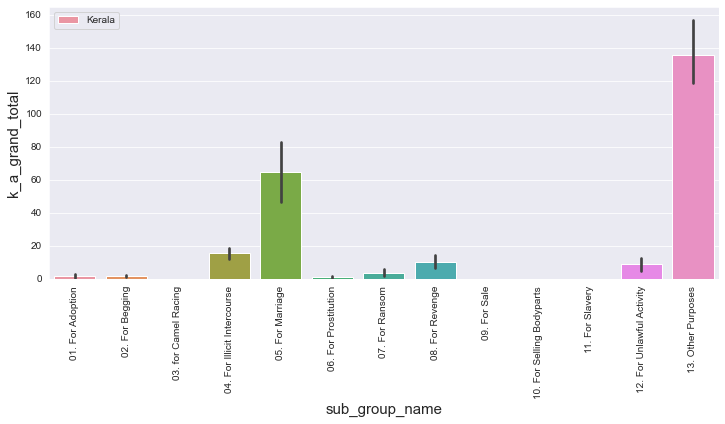

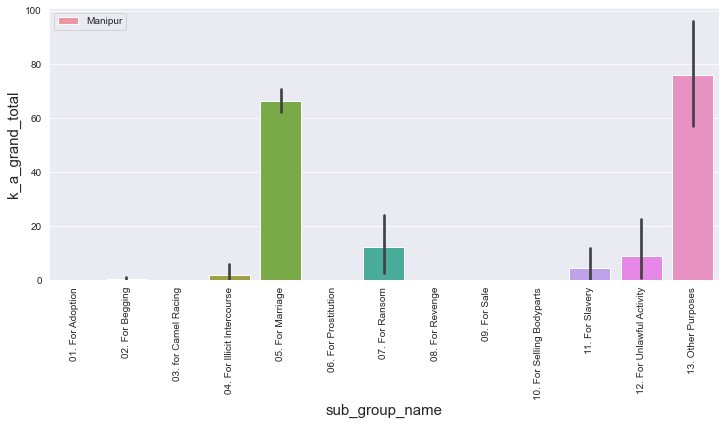

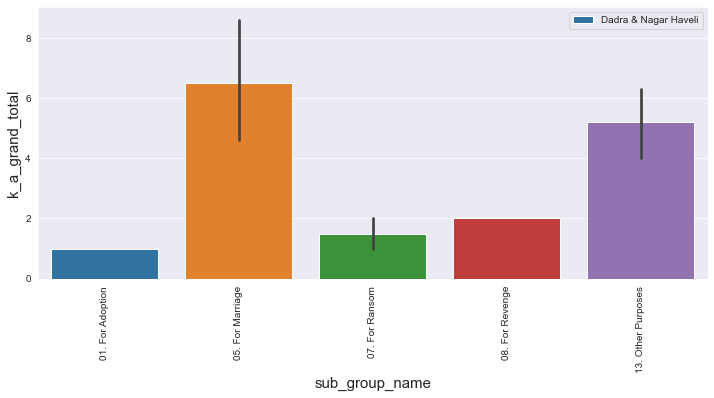

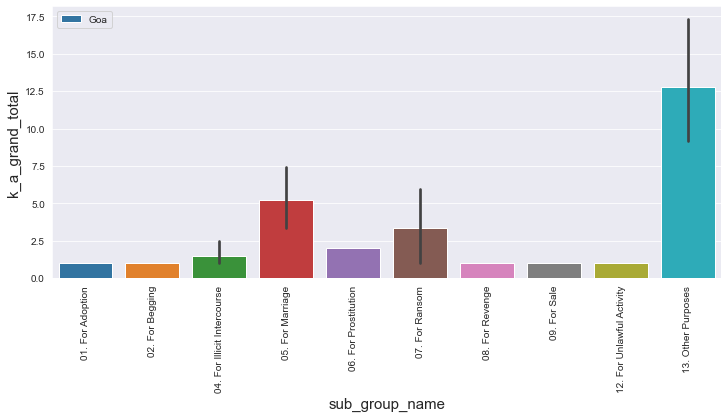

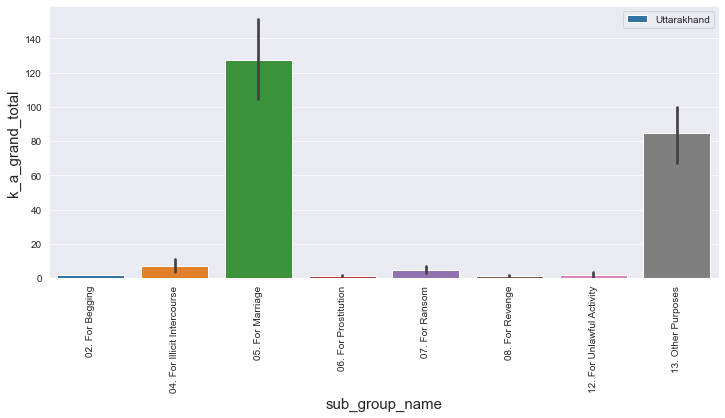

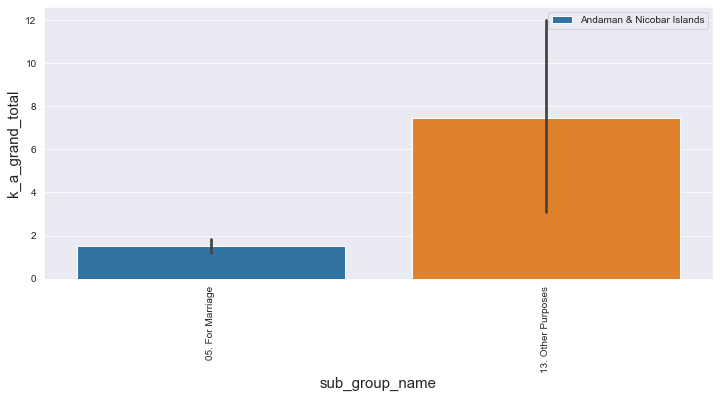

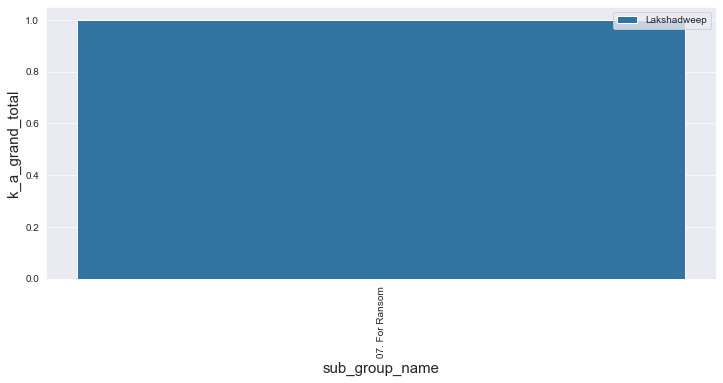

In [74]:
# Plotting the distribution of kidnaps for various categories for all the states in India
sns.set_style('darkgrid')
for state_ut in state_uts:
    plt.figure(figsize = (12,5))
    sns.barplot('sub_group_name',
               'k_a_grand_total',
               data = Kidnap_data[(Kidnap_data['group_name'] != 'Kidnap - Total') & (Kidnap_data['area_name'] == state_ut )],
               label = state_ut);
    plt.legend()
    plt.xlabel('sub_group_name',size = 15)
    plt.ylabel('k_a_grand_total',size = 15)
    plt.xticks(rotation = 90);

* In majority of Indian states Kidnapes have been majorly occuring for marriage and other Purposes
*     **State** -----------------------------------------------------------------------------------------------**Major Reason** 
* Andhra Pradesh,Delhi,Karnata,Mizoram, Nagaland,Kerala,Goa -----------------  Other Purposes
* Jammu and Kashmir ------------------------------------------------------------------------- Marriage, Illict Intercourse
* Meghalaya,Tripura ---------------------------------------------------------------------------- Ransom
* Sikkim -------------------------------------------------------------------------------------------- Adoption
* Daman & Diu ---------------------------------------------------------------------------------- Other Purposes and Revenge
* Lakshadweep ---------------------------------------------------------------------------------- only Ransom cases are reported

## Offenders relation to the rape victim

In [81]:
pd.read_csv('20_victims_of_rape.csv').subgroup.unique()

array(['Total Rape Victims', 'Victims of Incest Rape',
       'Victims of Other Rape'], dtype=object)

In [78]:
Rape_data = pd.read_csv('21_offenders_known_to_the_victim.csv')

In [79]:
Rape_data.columns

Index(['area_name', 'year',
       'no_of_cases_in_which_offenders_were_known_to_the_victims',
       'no_of_cases_in_which_offenders_were_neighbours',
       'no_of_cases_in_which_offenders_were_other_known_persons',
       'no_of_cases_in_which_offenders_were_parentsclose_family_members',
       'no_of_cases_in_which_offenders_were_relatives'],
      dtype='object')

In [117]:
Rape_data.rename(columns =  {'no_of_cases_in_which_offenders_were_known_to_the_victims':'known_to_the_victims',
                         'no_of_cases_in_which_offenders_were_neighbours':'neighbours',
                         'no_of_cases_in_which_offenders_were_other_known_persons':'other_known_persons',
                         'no_of_cases_in_which_offenders_were_parentsclose_family_members':'parentsclose_family_members',
                         'no_of_cases_in_which_offenders_were_relatives':'relatives'},
                inplace = True)

In [118]:
Rape_data.isna().sum()

area_name                      0
year                           0
known_to_the_victims           0
neighbours                     0
other_known_persons            0
parentsclose_family_members    0
relatives                      0
dtype: int64

* There are no null values in the data

In [119]:
Rape_data.head()

,area_name,year,known_to_the_victims,neighbours,other_known_persons,parentsclose_family_members,relatives
0,Madhya Pradesh,2007,3010,1397,1384,49,180
1,Madhya Pradesh,2008,2937,1279,1433,52,173
2,Madhya Pradesh,2009,2998,1254,1528,14,202
3,Madhya Pradesh,2010,3135,1223,1659,21,232
4,West Bengal,2010,2134,1037,987,4,106


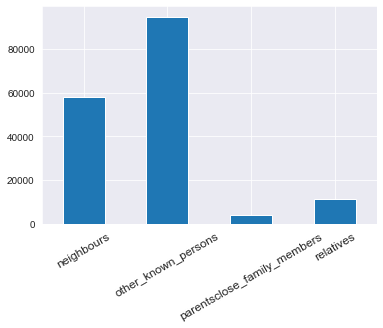

In [125]:
Rape_data.sum()[3:].plot.bar();
plt.xticks(rotation = 30,size = 12);

**In India most offenders were known Rape victims other known persons than neighbors and family and follwed by neighbors**

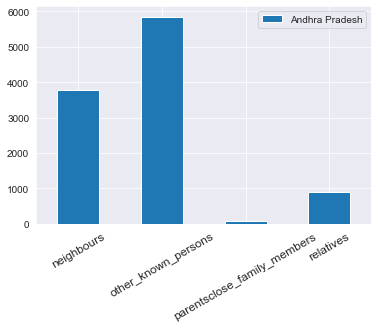

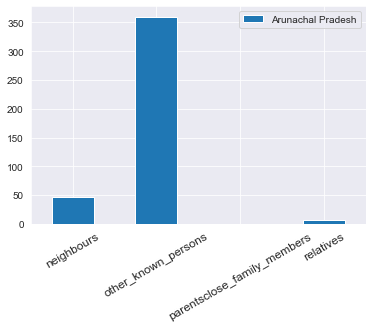

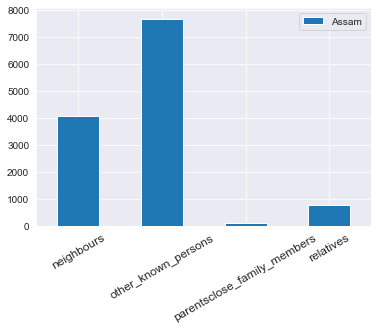

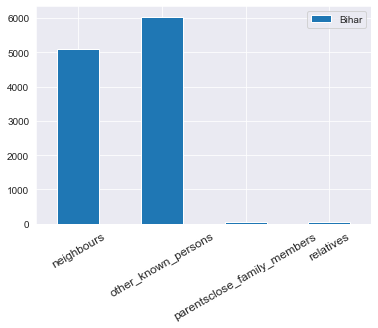

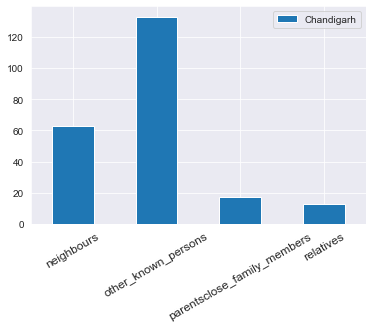

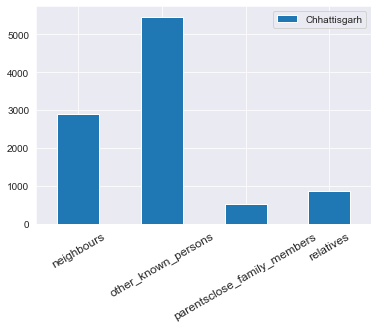

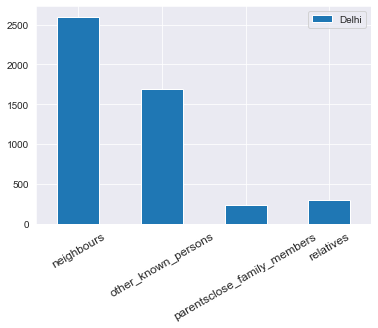

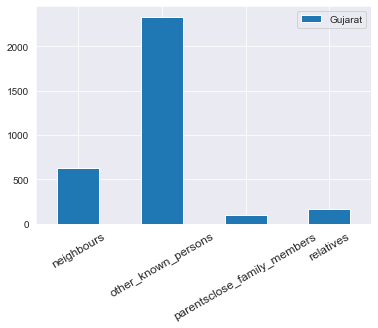

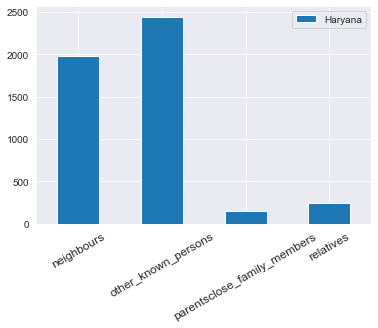

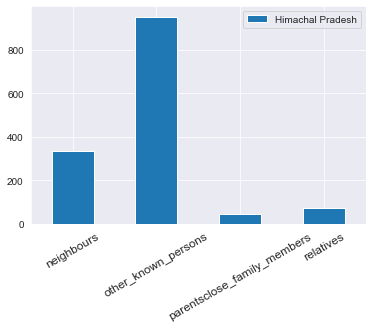

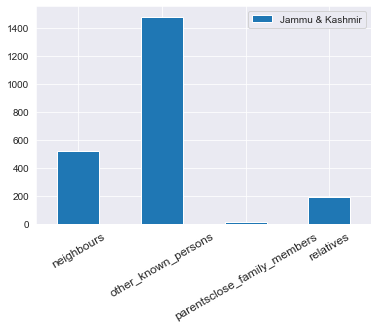

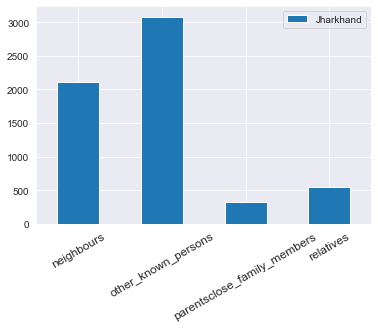

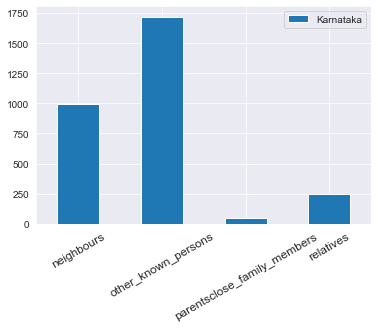

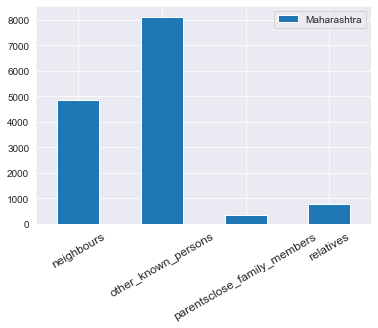

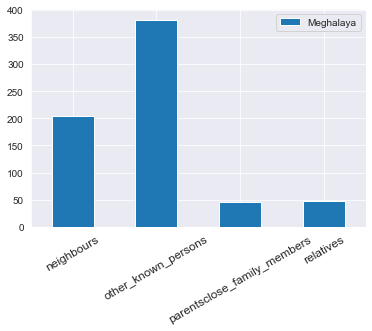

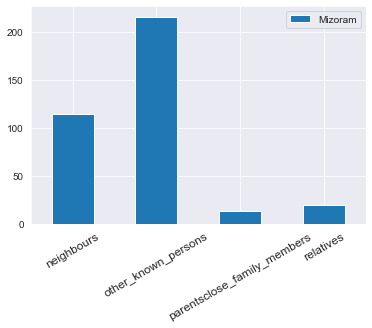

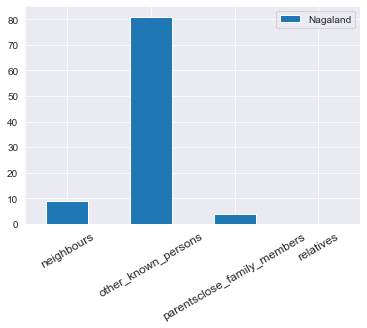

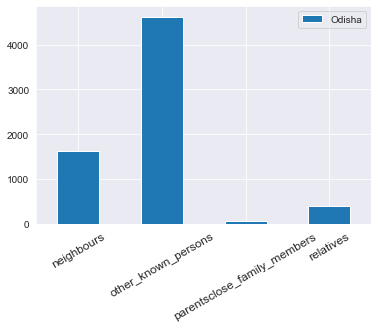

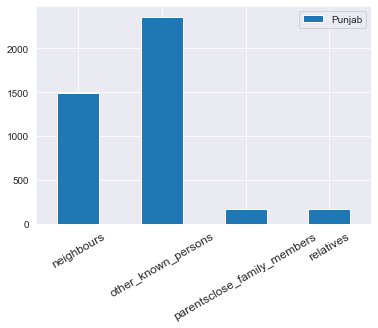

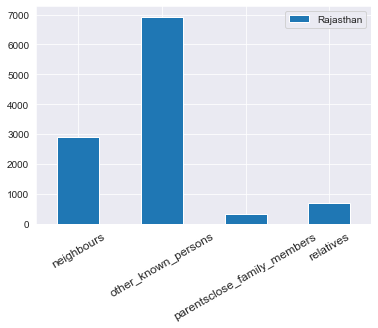

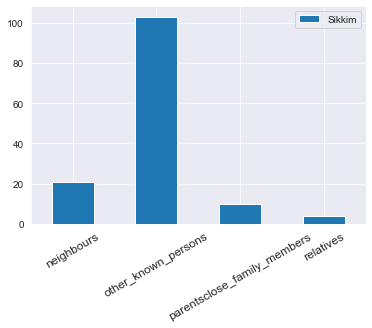

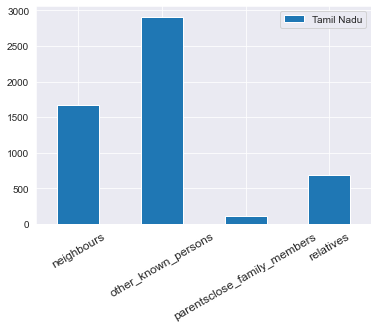

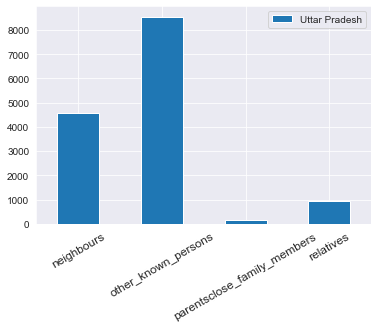

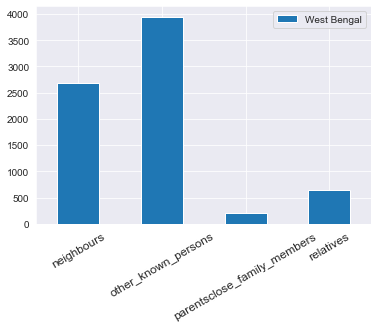

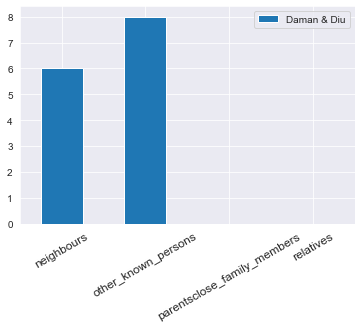

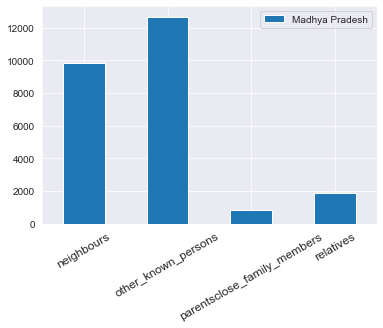

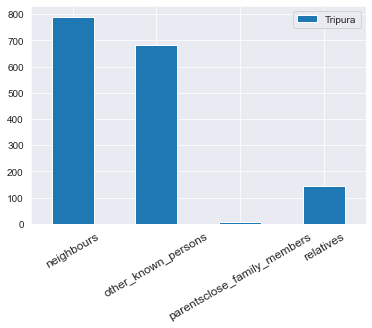

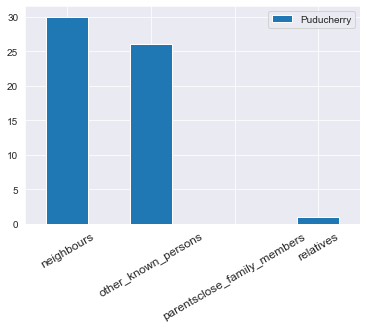

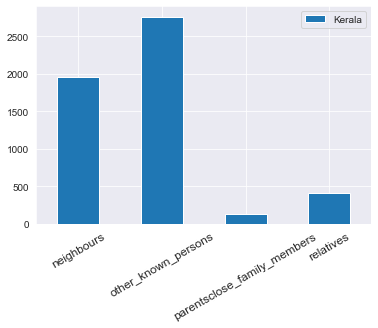

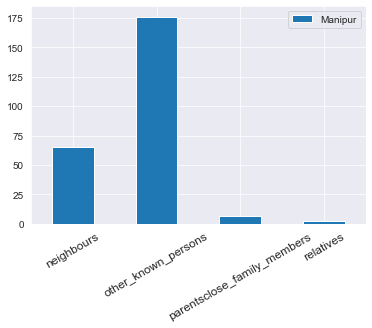

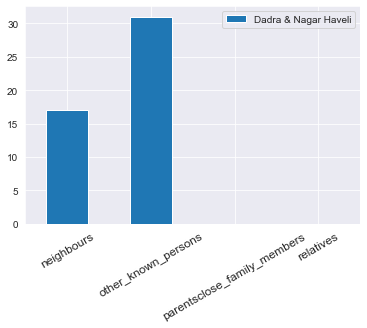

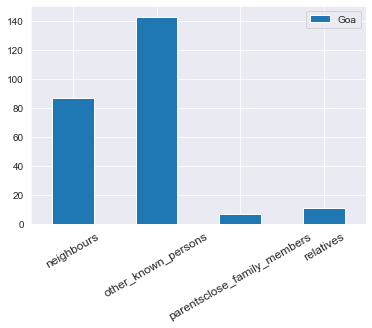

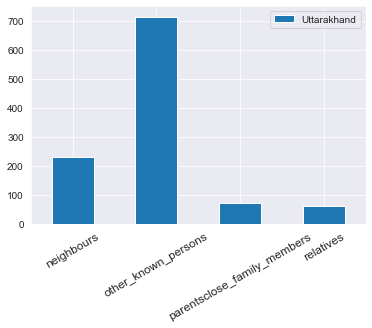

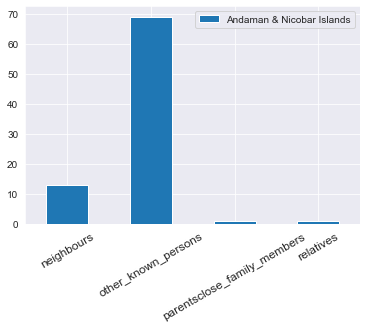

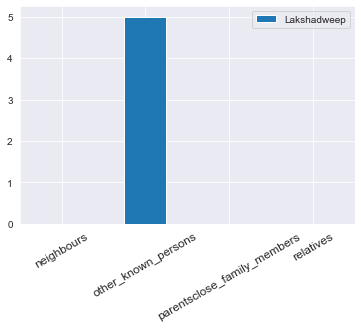

In [157]:
# plotting the distribution of various categories for each abd every state in India
for state_ut in state_uts:
    Rape_data[Rape_data['area_name'] == state_ut].sum()[3:].plot.bar(label = state_ut);
    plt.legend()
    plt.xticks(rotation = 30,size = 12);
    plt.show()

* In most of the states the instances have been occured with known persons other than family and neighbors
* In Delhi,Tripura,Puducherry the instances are frequent with Neighbors 

## Juveniles family background, education and economic setup.

In [165]:
juveniles_arrested_family_background = pd.read_csv('18_03_juveniles_arrested_family_background.csv')

In [166]:
juveniles_arrested_family_background.columns

Index(['area_name', 'year', 'sub_group_name', 'family_back_ground_homeless',
       'family_back_ground_living_with_guardian',
       'family_back_ground_living_with_parents', 'family_back_ground_total'],
      dtype='object')

In [167]:
juveniles_arrested_family_background.isna().sum()

area_name                                  0
year                                       0
sub_group_name                             0
family_back_ground_homeless                0
family_back_ground_living_with_guardian    0
family_back_ground_living_with_parents     0
family_back_ground_total                   0
dtype: int64

* The data has no null values

In [171]:
juveniles_arrested_family_background.sum()[3:-1]

family_back_ground_homeless                 22347
family_back_ground_living_with_guardian     47630
family_back_ground_living_with_parents     261498
dtype: object

It is Quite intersting to know that More crimes are being commited by Juviniles living with their paremts

In [172]:
juveniles_arrested_education = pd.read_csv('18_01_juveniles_arrested_education.csv')

In [173]:
juveniles_arrested_education.columns

Index(['area_name', 'year', 'sub_group_name',
       'education_above_primary_but_below_matric_or_higher_secondary',
       'education_illiterate', 'education_matric_or_higher_secondary_above',
       'education_total', 'education_upto_primary'],
      dtype='object')

In [174]:
juveniles_arrested_education.isna().sum()

area_name                                                       0
year                                                            0
sub_group_name                                                  0
education_above_primary_but_below_matric_or_higher_secondary    0
education_illiterate                                            0
education_matric_or_higher_secondary_above                      0
education_total                                                 0
education_upto_primary                                          0
dtype: int64

In [181]:
juveniles_arrested_education.drop(columns = 'education_total').sum()[3:]

education_above_primary_but_below_matric_or_higher_secondary     93637
education_illiterate                                             85862
education_matric_or_higher_secondary_above                       25460
education_upto_primary                                          126516
dtype: object

* people with higher education levels are less likely to commit crimes compared to people with lesser education

In [183]:
juveniles_arrested_economic_setup = pd.read_csv('18_02_juveniles_arrested_economic_setup.csv')

In [188]:
juveniles_arrested_economic_setup.rename(columns = {'economic_set_up_annual_income_250001_to_50000':'25001_to_50000',
                                                   'economic_set_up_annual_income_upto_rs_25000':'upto_rs_25000',
                                                   'economic_set_up_middle_income_from_100001_to_200000':'100001_to_200000',
                                                   'economic_set_up_middle_income_from_50001_to_100000':'50001_to_100000',
                                                   'economic_set_up_upper_income_above_rs_300000':'above_rs_300000',
                                                   'economic_set_up_upper_middle_income_from_200001_to_300000':'200001_to_300000'},
                                        inplace = True)

In [192]:
juveniles_arrested_economic_setup.drop(columns = 'economic_set_up_total').sum()[3:].sort_values(ascending = False)

upto_rs_25000       229828
25001_to_50000       65510
50001_to_100000      26834
100001_to_200000      7218
200001_to_300000      1622
above_rs_300000        463
dtype: object

* Juviniles are more in number fromm the familes with annual income less than 25000,
* As the annual income of the family increases the number of juvuniles from each economic group are decreasing

* **Most of the Juviniles are from lower economic background and are not well educated**

## Which state has more crime against  women

In [202]:
crimes_against_women = pd.concat([pd.read_csv('42_district_wise_crimes_committed_against_women_2001_2012.csv'),
           pd.read_csv('42_district_wise_crimes_committed_against_women_2013.csv')])

In [203]:
crimes_against_women.columns

Index(['state_ut', 'district', 'year', 'rape', 'kidnapping_and_abduction',
       'dowry_deaths', 'assault_on_women_with_intent_to_outrage_her_modesty',
       'insult_to_modesty_of_women', 'cruelty_by_husband_or_his_relatives',
       'importation_of_girls'],
      dtype='object')

In [256]:
crimes_against_women.shape

(9840, 11)

In [221]:
# State_ut values from 2001 - 2012 are capital converting them into titles
def f(r):
    return str.title(r)


crimes_against_women['state_ut'] = crimes_against_women['state_ut'].map(f)

In [223]:
crimes_against_women.groupby('state_ut').sum()[:2]

,year,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls
state_ut,,,,,,,,
A & N Islands,72239,218,154,12,428,86,242,0
A&N Islands,8052,54,24,2,90,16,18,0


In [225]:
# formattiing A&N Islands
def f(r):
    if r == 'A&N Islands':
        return 'A & N Islands'
    else:
        return r


crimes_against_women['state_ut'] = crimes_against_women['state_ut'].map(f)

In [237]:
crimes_against_women.drop(columns = 'year').groupby('state_ut').sum()

,rape,kidnapping_and_abduction,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls
state_ut,,,,,,,
A & N Islands,272,178,14,518,102,260,0
Andhra Pradesh,30228,33062,13414,117858,81666,268182,34
Arunachal Pradesh,1150,1288,4,1754,42,392,0
Assam,36230,54284,2892,32058,252,96048,20
Bihar,28504,47616,29460,15814,556,60426,894
Chandigarh,652,1416,86,914,338,1798,0
Chhattisgarh,26436,9022,2502,42852,3810,21508,12
D & N Haveli,112,188,2,100,8,76,0
D&N Haveli,10,22,0,2,2,2,0


In [243]:
# creating grand_total column as the sum of crimes under all categories
def f(r):
    return r.rape + r.kidnapping_and_abduction + r.dowry_deaths + r.assault_on_women_with_intent_to_outrage_her_modesty + r.insult_to_modesty_of_women + r.cruelty_by_husband_or_his_relatives + r.importation_of_girls



crimes_against_women['grand_total'] = crimes_against_women.apply(f, axis =1)

In [257]:
crimes_against_women[crimes_against_women['district'] != 'ZZ TOTAL'].groupby('state_ut')['grand_total'].sum().sort_values(ascending = False)

state_ut
Andhra Pradesh       514006
Uttar Pradesh        479833
West Bengal          435489
Madhya Pradesh       389147
Rajasthan            381432
Maharashtra          354127
Assam                204394
Kerala               192041
Gujarat              187049
Bihar                171618
Odisha               163882
Karnataka            146064
Tamil Nadu           145172
Haryana              121597
Chhattisgarh          99149
Delhi                 96178
Jharkhand             66101
Punjab                63252
Jammu & Kashmir       61639
Tripura               26773
Uttarakhand           25356
Himachal Pradesh      22834
Delhi Ut              12853
Chandigarh             4723
Manipur                4629
Meghalaya              4355
Arunachal Pradesh      4344
Mizoram                3615
Goa                    2762
Puducherry             2523
A & N Islands          1242
Sikkim                 1187
Nagaland                880
D & N Haveli            486
Daman & Diu             198
Lakshadweep

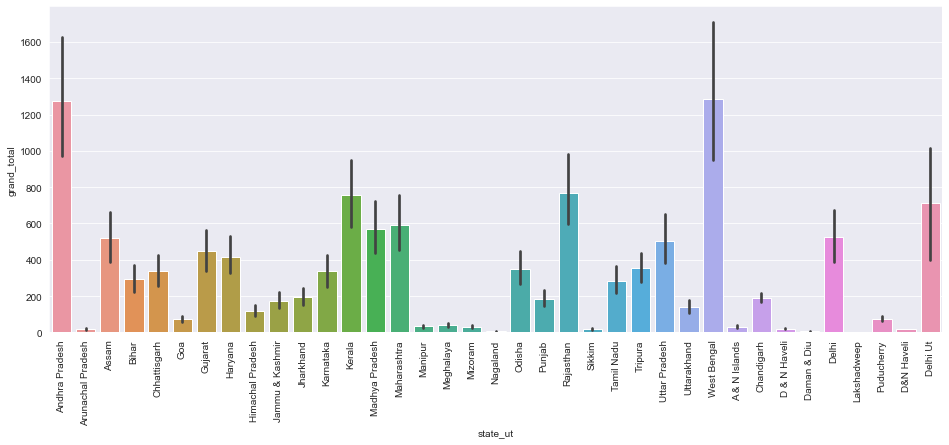

In [264]:
plt.figure(figsize = (16,6))
sns.barplot('state_ut',
           'grand_total',
           data = crimes_against_women[crimes_against_women['district'] != 'ZZ TOTAL']);
plt.xticks(rotation = 90);

* The majority of crimes against women are happing in Andhra Pradesh

In [276]:
crimes_against_women[crimes_against_women['state_ut'] == 'Andhra Pradesh'].sum(axis = 0)[3:-1].sort_values(ascending = False)

cruelty_by_husband_or_his_relatives                    268182
assault_on_women_with_intent_to_outrage_her_modesty    117858
insult_to_modesty_of_women                              81666
kidnapping_and_abduction                                33062
rape                                                    30228
dowry_deaths                                            13414
importation_of_girls                                       34
dtype: object

* Of the crimes happening in Andhra Pradesh against women cruelty_by_husband_or_his_relatives are significantly in high number

In [367]:
Crimes_against_children = pd.concat([pd.read_csv('03_district_wise_crimes_committed_against_children_2001_2012.csv'),
                                     pd.read_csv('03_district_wise_crimes_committed_against_children_2013.csv')])

In [368]:
Crimes_against_children.isna().sum()

abetment_of_suicide                    11
buying_of_girls_for_prostitution       11
district                                0
exposure_and_abandonment               11
foeticide                              11
infanticid                           9015
kidnapping_and_abduction               11
murder                                834
other_crimes                           11
other_murder                         9015
procuration_of_minor_girls             11
prohibition_of_child_marriage_act      11
rape                                   11
selling_of_girls_for_prostitution      11
state_ut                                0
total                                   0
year                                    0
dtype: int64

In [369]:
Crimes_against_children = Crimes_against_children.fillna(0)

Total represents the total number of crimes against children 

In [ ]:
sns.lineplot(Crimes_against_children())

In [379]:
# State_ut values from 2001 - 2012 are capital converting them into titles
def f(r):
    return str.title(r)


Crimes_against_children['state_ut'] = Crimes_against_children['state_ut'].map(f)

In [384]:
# formattiing A&N Islands
def f(r):
    if r == 'A&N Islands':
        return 'A & N Islands'
    if r == 'D&N Haveli':
        return 'D & N Haveli'
    if r == 'Delhi Ut':
        return 'Delhi'
    else:
        return r


Crimes_against_children['state_ut'] = Crimes_against_children['state_ut'].map(f)

In [388]:
Crimes_against_children.groupby('state_ut')['total'].sum()

state_ut
A & N Islands           598
Andhra Pradesh        38310
Arunachal Pradesh       664
Assam                  4476
Bihar                 22886
Chandigarh             1932
Chhattisgarh          34379
D & N Haveli            234
Daman & Diu             104
Delhi                 64447
Goa                    2140
Gujarat               26502
Haryana               12140
Himachal Pradesh       4838
Jammu & Kashmir        1014
Jharkhand              2188
Karnataka              9774
Kerala                17636
Lakshadweep               4
Madhya Pradesh       107264
Maharashtra           75422
Manipur                1476
Meghalaya              1806
Mizoram                1002
Nagaland                152
Odisha                 6438
Puducherry              504
Punjab                12614
Rajasthan             27964
Sikkim                  632
Tamil Nadu            14214
Tripura                1932
Uttar Pradesh         91718
Uttarakhand            1839
West Bengal           18576
Name: total

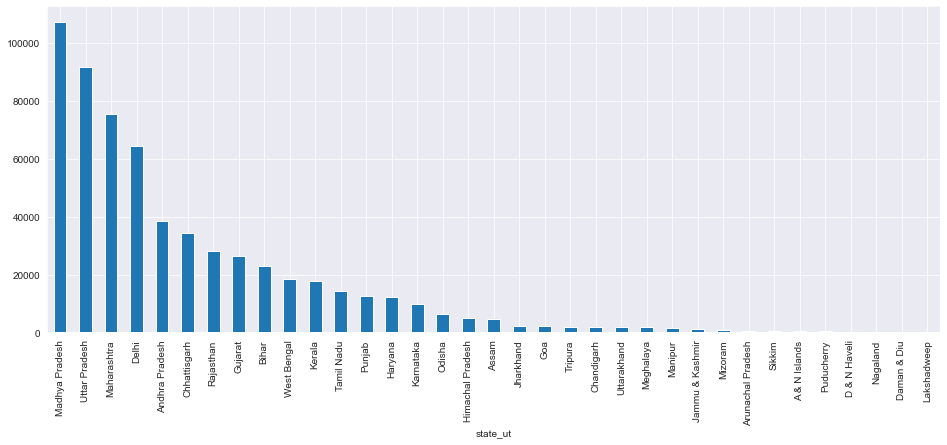

In [401]:
plt.figure(figsize = (16,6))
Crimes_against_children.groupby('state_ut')['total'].sum().sort_values(ascending = False).plot.bar();
plt.xticks(size = 10);
plt.yticks(size = 10);

* Madhya Pradesh has maximum number of crimes against children

## Age group wise murder victim

In [279]:
murder_victims_age = pd.read_csv('32_murder_victim_age_sex.csv')

In [280]:
murder_victims_age.isna().sum()

area_name                   0
year                        0
group_name                  0
sub_group_name              0
victims_above_50_yrs       56
victims_total               0
victims_upto_10_15_yrs    142
victims_upto_10_yrs       118
victims_upto_15_18_yrs    130
victims_upto_18_30_yrs      9
victims_upto_30_50_yrs     11
dtype: int64

In [290]:
murder_victims_age.rename(columns = {'victims_above_50_yrs':'above_50_yrs',
                                    'victims_upto_10_15_yrs':'10_15_yrs',
                                    'victims_upto_10_yrs':'upto_10_yrs',
                                    'victims_upto_15_18_yrs':'15_18_yrs',
                                    'victims_upto_18_30_yrs':'18_30_yrs',
                                    'victims_upto_30_50_yrs':'30_50_yrs'},
                         inplace = True)

In [291]:
murder_victims_age = murder_victims_age.fillna(0)

In [292]:
murder_victims_age.isna().sum()

area_name         0
year              0
group_name        0
sub_group_name    0
above_50_yrs      0
victims_total     0
10_15_yrs         0
upto_10_yrs       0
15_18_yrs         0
18_30_yrs         0
30_50_yrs         0
dtype: int64

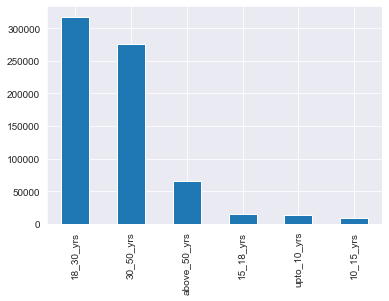

In [293]:
murder_victims_age.drop(columns = 'victims_total').sum()[4:].sort_values(ascending = False).plot.bar();

* It is seen that majority of murder victims are under between age group of 18 to 30 years

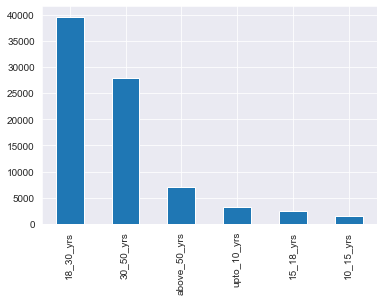

In [297]:
# Plotting the distribution of female nurder victions for different age groups
murder_victims_age[murder_victims_age['group_name'] == 'Murder - Female Victims'].drop(columns = 'victims_total').sum()[4:].sort_values(ascending = False).plot.bar();

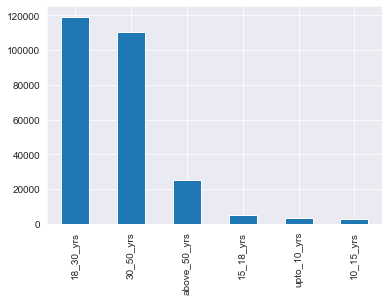

In [298]:
# Plotting the distribution of female nurder victions for different age groups
murder_victims_age[murder_victims_age['group_name'] == 'Murder - Male Victims'].drop(columns = 'victims_total').sum()[4:].sort_values(ascending = False).plot.bar();

* For both Male and Female murder victims the majority are between the age of 18 to 30 years

## Crime by place of occurrence

In [305]:
Crime_by_place = pd.concat([pd.read_csv('17_crime_by_place_of_occurrence_2001_2012.csv'),
                            pd.read_csv('17_crime_by_place_of_occurrence_2013.csv')])

In [307]:
Crime_by_place.isna().sum()

state_ut                              0
year                                  0
residential_premises_dacoity          0
residential_premises_robbery          0
residential_premises_burglary         0
residential_premises_theft            0
highways_dacoity                      0
highways_robbery                      0
highways_burglary                     0
highways_theft                        0
river_and_sea_dacoity                 0
river_and_sea_robbery                 0
river_and_sea_burglary                0
river_and_sea_theft                   0
railways_dacoity                      0
railways_robbery                      0
railways_burglary                     0
railways_theft                        0
banks_dacoity                         0
banks_robbery                         0
banks_burglary                        0
banks_theft                           0
commercial_establishments_dacoity     0
commercial_establishments_robbery     0
commercial_establishments_burglary    0


In [308]:
# Creating new column residential_total for the sum of all crimes in residential places
def f(r):
    return r.residential_premises_dacoity + r.residential_premises_robbery + r.residential_premises_burglary + r.residential_premises_theft

    
Crime_by_place['residential_total'] = Crime_by_place.apply(f, axis =1)

In [309]:
# Creating new column highways_total for the sum of all crimes in residential places
def f(r):
    return r.highways_dacoity + r.highways_robbery + r.highways_burglary + r.highways_theft

    
Crime_by_place['highways_total'] = Crime_by_place.apply(f, axis =1)

In [310]:
# Creating new column river_and_sea_total for the sum of all crimes in residential places
def f(r):
    return r.river_and_sea_dacoity + r.river_and_sea_robbery + r.river_and_sea_burglary + r.river_and_sea_theft

    
Crime_by_place['river_and_sea_total'] = Crime_by_place.apply(f, axis =1)

In [311]:
# Creating new column railways_total for the sum of all crimes in residential places
def f(r):
    return r.railways_dacoity + r.railways_robbery + r.railways_burglary + r.railways_theft

    
Crime_by_place['railways_total'] = Crime_by_place.apply(f, axis =1)

In [312]:
# Creating new column banks_total for the sum of all crimes in residential places
def f(r):
    return r.banks_dacoity + r.banks_robbery + r.banks_burglary + r.banks_theft

    
Crime_by_place['banks_total'] = Crime_by_place.apply(f, axis =1)

In [313]:
# Creating new commercial_establishments_total for the sum of all crimes in residential places
def f(r):
    return r.commercial_establishments_dacoity + r.commercial_establishments_robbery + r.commercial_establishments_burglary + r.commercial_establishments_theft

    
Crime_by_place['commercial_establishments_total'] = Crime_by_place.apply(f, axis =1)

In [314]:
# Creating new column other_places_total for the sum of all crimes in residential places
def f(r):
    return r.other_places_dacoity + r.other_places_robbery + r.other_places_burglary + r.other_places_theft

    
Crime_by_place['other_places_total'] = Crime_by_place.apply(f, axis =1)

In [316]:
total_crimes_by_places = Crime_by_place[['residential_total','highways_total','river_and_sea_total','railways_total','banks_total','commercial_establishments_total','other_places_total']]

In [320]:
total_crimes_by_places.sum()

residential_total                  5512241
highways_total                      760187
river_and_sea_total                  10749
railways_total                      582203
banks_total                          36285
commercial_establishments_total    1630720
other_places_total                 7372371
dtype: int64

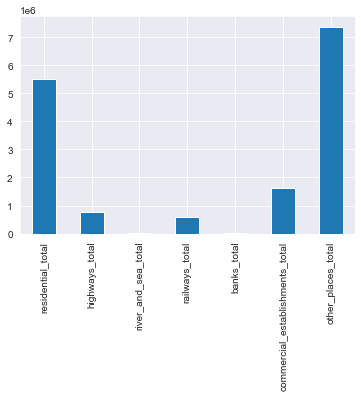

In [319]:
total_crimes_by_places.sum().plot.bar();

* A part from other places more number of crimes have been taking place in residential places

## Anti corruption cases vs arrests

In [332]:
anti_corruption_cases = pd.read_csv('23_anti_corruprion_cases.csv')

In [333]:
anti_corruption_arrests = pd.read_csv('24_anti_corruption_arrests.csv')

In [334]:
anti_corruption_cases.isna().sum()

area_name                                                                                                   0
year                                                                                                        0
ac01_no_of_cases_pending_investigation_from_previous_year                                                   0
ac02_no_of_cases_registered_during_the_year                                                                 0
ac03_total_no_of_cases_for_investigation_during_the_year                                                    0
ac04_no_of_cases_investigated_during_the_year                                                               0
ac05_no_of_cases_not_investigatedor_in_which_investigation_was_dropped_due_to_any_reason_during_the_year    0
ac06_no_of_cases_transferred_to_local_police_during_the_year                                                0
ac07_no_of_cases_declared_false_mistake_of_fact_or_of_law_or_non_cognizable_or_civil_in_nature              0
ac08_no_of

In [330]:
anti_corruption_arrests.isna().sum()

area_name                                                                                                      0
year                                                                                                           0
aca01_no_of_persons_in_custody_or_on_bail_during_the_stage_of_investigation_at_the_beginning_of_the_year       0
aca02_no_of_persons_arrested_during_the_year                                                                   0
aca04_no_of_persons_in_custody_or_on_bail_during_the_stage_of_investigation_at_the_end_of_the_year             0
aca05_no_of_persons_in_whose_cases_charge_sheets_were_laid_during_the_year                                     0
aca06_no_of_persons_under_trial_at_the_beginning_of_the_year                                                   0
aca07_total_no_of_persons_under_trial_during_the_year                                                          0
aca08_no_of_persons_whose_cases_were_withdrawn_or_otherwise_disposed_off_during_the_year        

In [350]:
anti_corruption_arrests =  anti_corruption_arrests.fillna(0)

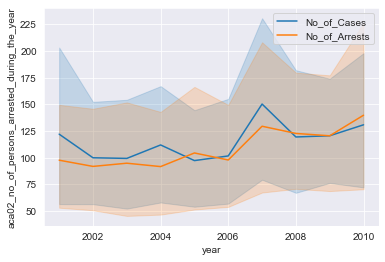

In [351]:
sns.lineplot(anti_corruption_arrests['year'],
             anti_corruption_arrests['aca05_no_of_persons_in_whose_cases_charge_sheets_were_laid_during_the_year'],
            sort = True, label = 'No_of_Cases');

sns.lineplot(anti_corruption_arrests['year'],
             anti_corruption_arrests['aca02_no_of_persons_arrested_during_the_year'],
            sort = True, label = 'No_of_Arrests');

In the case of anti corruption it is seen that number of arrests were less than the number of cases inspite of the pending previous years cases

## Which state has more number of complaints against police?


In [354]:
complaints_against_police = pd.read_csv('25_complaints_against_police.csv')

In [355]:
complaints_against_police.columns

Index(['area_name', 'year', 'sub_group', 'cpa_cases_registered',
       'cpa_cases_reported_for_dept_action',
       'cpa_complaints_cases_declared_false_unsubstantiated',
       'cpa_complaints_received_alleged', 'cpa_no_of_departmental_enquiries',
       'cpa_no_of_magisterial_enquiries',
       'cpa_cases_sent_for_trials_charge_sheeted',
       'cpa_no_of_judicial_enquiries', 'cpb_police_personnel_acquitted',
       'cpb_police_personnel_convicted',
       'cpb_police_personnel_sent_up_for_trial',
       'cpb_police_personnel_trial_completed',
       'cpb_police_personnel_cases_withdrawn_or_otherwise_disposed_of',
       'cpc_police_personnel_cases_trial_completed',
       'cpc_police_personnel_cases_withdrawn_or_otherwise_disposed_of',
       'cpc_police_personnel_disciplinary_action_initiated',
       'cpc_police_personnel_dismissal_removal_from_service',
       'cpc_police_personnel_major_punishment_awarded',
       'cpc_police_personnel_minor_punishment_awarded'],
      dtype='o

In [356]:
complaints_against_police.isna().sum()

area_name                                                        0
year                                                             0
sub_group                                                        0
cpa_cases_registered                                             0
cpa_cases_reported_for_dept_action                               0
cpa_complaints_cases_declared_false_unsubstantiated              0
cpa_complaints_received_alleged                                  0
cpa_no_of_departmental_enquiries                                 0
cpa_no_of_magisterial_enquiries                                  0
cpa_cases_sent_for_trials_charge_sheeted                         0
cpa_no_of_judicial_enquiries                                     0
cpb_police_personnel_acquitted                                   0
cpb_police_personnel_convicted                                   0
cpb_police_personnel_sent_up_for_trial                           0
cpb_police_personnel_trial_completed                          

In [408]:
complaints_against_police.tail()

,area_name,year,sub_group,cpa_cases_registered,cpa_cases_reported_for_dept_action,cpa_complaints_cases_declared_false_unsubstantiated,cpa_complaints_received_alleged,cpa_no_of_departmental_enquiries,cpa_no_of_magisterial_enquiries,cpa_cases_sent_for_trials_charge_sheeted,...,cpb_police_personnel_sent_up_for_trial,cpb_police_personnel_trial_completed,cpb_police_personnel_cases_withdrawn_or_otherwise_disposed_of,cpc_police_personnel_cases_trial_completed,cpc_police_personnel_cases_withdrawn_or_otherwise_disposed_of,cpc_police_personnel_disciplinary_action_initiated,cpc_police_personnel_dismissal_removal_from_service,cpc_police_personnel_major_punishment_awarded,cpc_police_personnel_minor_punishment_awarded,total_complaints
345,Tamil Nadu,2010,Complaints Against Police Personnel,107,67,15,366,282,62,80,...,81,18,6,550,295,1620,32,457,642,555
346,Tripura,2010,Complaints Against Police Personnel,28,7,5,34,9,0,16,...,20,1,2,9,37,90,13,17,18,74
347,Uttar Pradesh,2010,Complaints Against Police Personnel,8701,8326,3418,12119,8693,8,45,...,95,7,1,8158,492,8650,171,1025,6962,32564
348,Uttarakhand,2010,Complaints Against Police Personnel,15,71,596,682,682,0,7,...,7,0,0,276,59,358,9,20,247,1364
349,West Bengal,2010,Complaints Against Police Personnel,5,27,0,33,32,0,5,...,5,0,0,32,11,214,0,99,382,65


In [402]:
# Creating a new column for total number of complaints against police

def f(r):
    return r.cpa_cases_registered + r.cpa_cases_reported_for_dept_action + r.cpa_complaints_cases_declared_false_unsubstantiated + r.cpa_complaints_received_alleged
    

complaints_against_police['total_complaints'] = complaints_against_police.apply(f, axis = 1) 

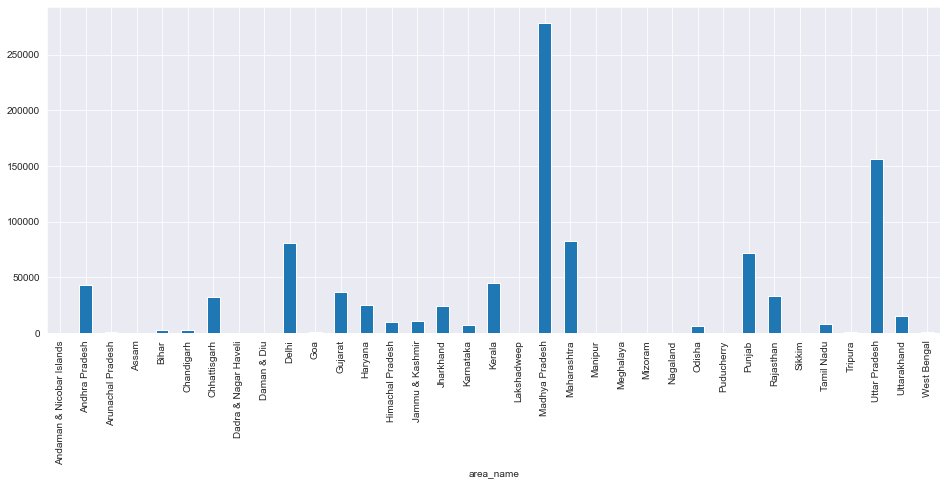

In [406]:
plt.figure(figsize = (16,6))
complaints_against_police.groupby('area_name')['total_complaints'].sum().plot.bar();


In [ ]:
* Madhya Pradesh has maximum number of complaints aginst police

## Which state is the safest for foreigners?

In [409]:
#District wise Crimes until 2013
DWC_13 = pd.concat([pd.read_csv('01_district_wise_crimes_committed_ipc_2001_2012.csv'),
                    pd.read_csv('01_district_wise_crimes_committed_ipc_2013.csv')])

In [411]:
DWC_13.columns

Index(['state_ut', 'district', 'year', 'murder', 'attempt_to_murder',
       'culpable_homicide_not_amounting_to_murder', 'rape', 'custodial_rape',
       'other_rape', 'kidnapping_abduction',
       'kidnapping_and_abduction_of_women_and_girls',
       'kidnapping_and_abduction_of_others', 'dacoity',
       'preparation_and_assembly_for_dacoity', 'robbery', 'burglary', 'theft',
       'auto_theft', 'other_theft', 'riots', 'criminal_breach_of_trust',
       'cheating', 'counterfieting', 'arson', 'hurt_grevious_hurt',
       'dowry_deaths', 'assault_on_women_with_intent_to_outrage_her_modesty',
       'insult_to_modesty_of_women', 'cruelty_by_husband_or_his_relatives',
       'importation_of_girls_from_foreign_countries',
       'causing_death_by_negligence', 'other_ipc_crimes', 'total_ipc_crimes'],
      dtype='object')

In [412]:
DWC_13.isna().sum()

state_ut                                               0
district                                               0
year                                                   0
murder                                                 0
attempt_to_murder                                      0
culpable_homicide_not_amounting_to_murder              0
rape                                                   0
custodial_rape                                         0
other_rape                                             0
kidnapping_abduction                                   0
kidnapping_and_abduction_of_women_and_girls            0
kidnapping_and_abduction_of_others                     0
dacoity                                                0
preparation_and_assembly_for_dacoity                   0
robbery                                                0
burglary                                               0
theft                                                  0
auto_theft                     

In [413]:
DWC_13.head()

,state_ut,district,year,murder,attempt_to_murder,culpable_homicide_not_amounting_to_murder,rape,custodial_rape,other_rape,kidnapping_abduction,...,arson,hurt_grevious_hurt,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls_from_foreign_countries,causing_death_by_negligence,other_ipc_crimes,total_ipc_crimes
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [417]:
# State_ut values from 2001 - 2012 are capital converting them into titles
def f(r):
    return str.title(r)


DWC_13['state_ut'] = DWC_13['state_ut'].map(f)

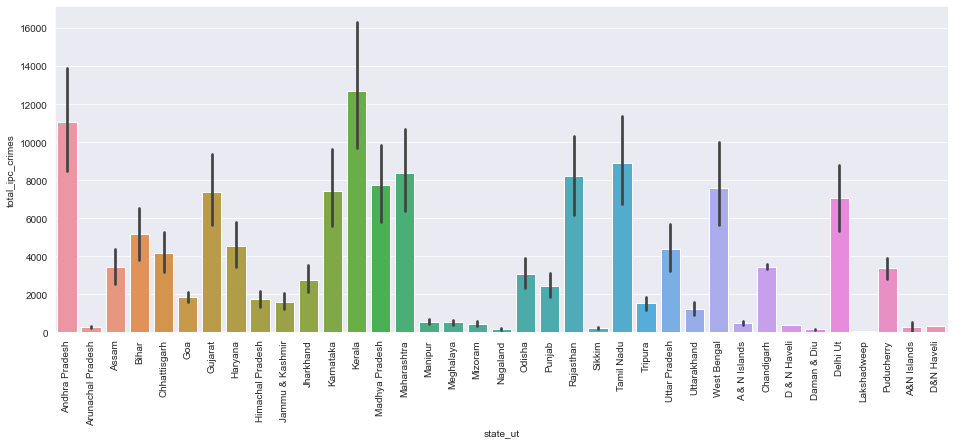

In [418]:
plt.figure(figsize = (16,6))
sns.barplot('state_ut',
           'total_ipc_crimes',
           data = DWC_13);
plt.xticks(rotation = 90);

In [424]:
DWC_13.groupby('state_ut')['total_ipc_crimes'].sum().sort_values()[:15]

state_ut
D&N Haveli              628
A&N Islands            1224
Lakshadweep            1566
Daman & Diu            6388
D & N Haveli           9302
Sikkim                15702
A & N Islands         18204
Nagaland              28698
Mizoram               55710
Meghalaya             57016
Arunachal Pradesh     60856
Goa                   72726
Manipur               76500
Chandigarh            89768
Puducherry           115744
Name: total_ipc_crimes, dtype: int64

The above states are reporting the lowest number of crimes, The top among these states can be consideres as the Safest States for foreiners